In [53]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
import numpy as np
from scipy.signal import argrelmax

from itertools import takewhile

In [2]:
import math

def format_exp (number, decimals=2):
    def exp_(f):
        return int(math.floor(math.log10(abs(f)))) if f != 0 else 0
    
    exponent = exp_(number)
    mantissa = number / 10**exponent
    
    return "%%.%if" % decimals % mantissa + "$\\times 10^{%s}$" % exponent

In [37]:
def read_file(folder_name = "./", file_name="B4_nt_B4_t%i.csv", num_threads=4):
    column_names = ["Energy", "Track_length"]
    
    data = pd.read_csv (file_name % 0, comment="#", header=None, names=column_names)
    for i in range(1, num_threads):
        data = data.append(pd.read_csv (file_name % i, comment="#", header=None, names=column_names))
    
    return data

In [146]:
def SimpleHistogram(X, name=None, plot_peaks=False, alpha=None):
    vals, bins, _ = plt.hist(X, 200, alpha=alpha);
    
    #ignore 0 and photopeak
    ylim  = vals[1:-1].max() * 1.1
    x_max = X.max()
    
    plt.ylim(0,ylim)
    plt.xlabel("E absorbed [MeV]")
    plt.ylabel("# of events")
    
    if bins[0] == 0:
        plt.text(0     + 0.005, ylim * 0.9, "<- %s" % format_exp(vals[0]),  horizontalalignment='left',  fontsize=8)
    
    plt.text(x_max - 0.005, ylim * 0.9, "%s ->" % format_exp(vals[-1]), horizontalalignment='right', fontsize=8)
    
    if plot_peaks:
        plot_peaks(bins[:-1], vals, ylim)
    
    if name:
        plt.savefig(name + ".svg")

In [50]:
def plot_peaks(x, y, ylim, diff=100, order=50):
    
    inds = argrelmax(y, order=order)[0]
    
    for ind in inds:
        plt.text(x[ind], min(y[ind], ylim)*0.9, "E = %.2f ->" % x[ind], horizontalalignment="right")

In [57]:
def plot_L_vs_E(data, name=None):
    plt.hist2d(data["Track_length"], data["Energy"], 50, norm=LogNorm());
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("lightgray")
    colbar = plt.colorbar();
    colbar.set_label("# of events")
    
    plt.xlabel("Track length [m]")
    plt.ylabel("E absorbed [MeV]")
    
    if name:
        plt.savefig(name + ".svg")

In [142]:
data = read_file()
data

,Energy,Track_length
0,1.000000,0.914596
1,0.818028,1.045090
2,0.694412,0.916748
3,0.556754,0.490054
4,0.038119,0.008548
...,...,...
24801,0.519515,0.571066
24802,0.751980,0.690231
24803,1.000000,0.740474
24804,0.627355,0.446020


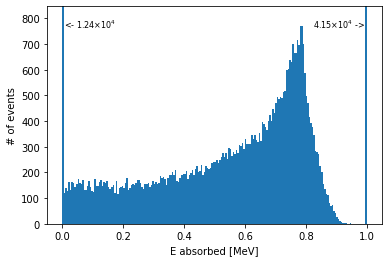

In [130]:
SimpleHistogram(data["Energy"])

In [131]:
pd.cut(data["Track_length"], [-np.inf, 0.8, np.inf])

0         (0.8, inf]
1         (0.8, inf]
2         (0.8, inf]
3        (-inf, 0.8]
4        (-inf, 0.8]
            ...     
24801    (-inf, 0.8]
24802    (-inf, 0.8]
24803    (-inf, 0.8]
24804    (-inf, 0.8]
24805    (-inf, 0.8]
Name: Track_length, Length: 100000, dtype: category
Categories (2, interval[float64]): [(-inf, 0.8] < (0.8, inf]]

In [132]:
asd = data.groupby(pd.cut(data["Track_length"], [-np.inf, 0.8, np.inf]))

(0, 1500)

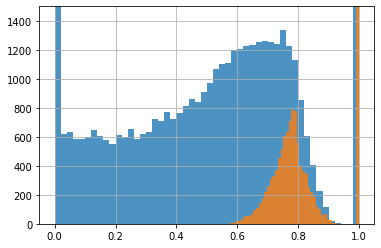

In [133]:
asd["Energy"].hist(stacked=True, alpha=0.8, bins=50)
plt.ylim(0, 1500)

(0, 5000)

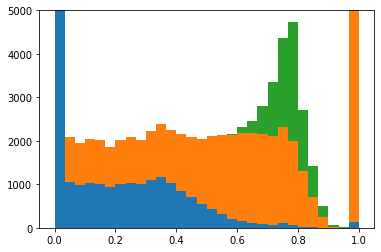

In [134]:

asd = [data[data["Track_length"] <= 0.4]["Energy"], data[data["Track_length"] <= 0.8]["Energy"], data[data["Track_length"] > 0.8]["Energy"]]
plt.hist(asd, stacked=True, bins=30);
plt.ylim(0, 5000)

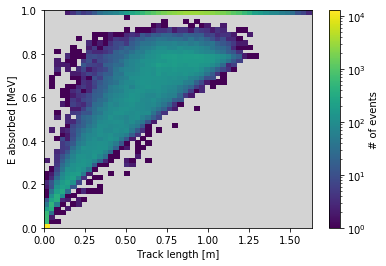

In [135]:
plot_L_vs_E(data)

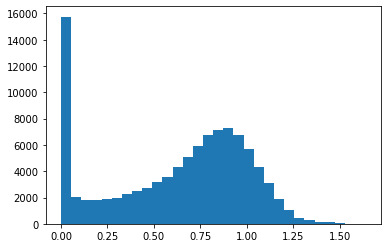

In [136]:
plt.hist(data["Track_length"], bins=30);

In [137]:
from scipy.stats import binned_statistic

avg, edges, _ = binned_statistic(data["Energy"], data["Track_length"], 'mean', bins=50)
x_ = edges[:-1]

/home/balazzs/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Average track length')

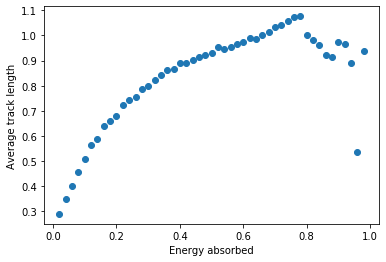

In [138]:
plt.plot(x_, avg/x_, "o")
plt.xlabel("Energy absorbed")
plt.ylabel("Average track length")

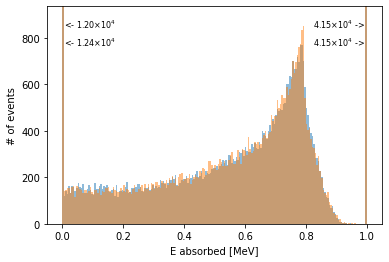

In [147]:
data_QBBC = read_file(".", "B4_nt_B4_QBBC__t%i.csv")
SimpleHistogram(data["Energy"]     , alpha=0.5)
SimpleHistogram(data_QBBC["Energy"], alpha=0.5)